
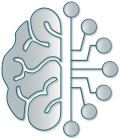

**Start at:** Monday 29 September 2025, 09:03:08  
**Hostname:** insa-12842 (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color, fg, bg, hl
vID.init(cwd0)
import tools4pyPhysChem as t4pPC

#cancel the "last show-up" behaviour of Jupyter notebooks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

__author__ = "romuald.poteau@utoulouse.fr"
__version__ = "20250925"

# 1D Convolutional Neural Networks (CNN)

## Introduction

### Convolution in mathematics and physics

<div class="intro">

Convolution is an important operation in signal and image processing. Convolution operates on two signals (in 1D) or two images (in 2D): you can think of one as the “input” signal (or image), and the other (called the **kernel**) as a “filter” on the input image, producing an output image. So convolution takes two images as input and produces a third as output.

Actually, [convolution is a mathematical process](https://en.wikipedia.org/wiki/Convolution) that "blends" two functions. If you take two functions *f* and *g* , there are a number of ways you can combine them. All basic operations can do this (addition, subtraction, multiplication, and division), but there are also special operations that only work with functions and do not work on standard variables or numbers. For example, $f \circ g$ is a composition of the two functions, where you plug  $g(x)$ into $f$. A convolution is another function-related operation, and is often notated with a star (∗) operator, where

$f∗g=h$
 
provides a third function, *h*, that is a blended version of two seemingly unrelated functions *f*  and *g*. it might be better to think of a **convolution as a method to apply a filter to a signal or image**.

In 1D, convolution is defined as the integral of the product of the two functions after one is reflected about the *y*-axis and shifted. As such, it is a particular kind of integral transform:

$$(f*g)(t)=\int_{-\infty}^{\infty}f(t)g(t-\tau)d\tau$$

</div>

#### Simple examples with numpy

##### Basic 1D arrays

<div class="intro">

Let's apply the `convolve` function of numpy to two 1D arrays, `f = [1,2,3,2,1]` and `g = [1,2,2]`, the **kernel**.

We want the resulting array, `h`, to have the same dimension as the largest array. The convolution operation first flips the first array before “sliding” the two across one another. Results in the green boxes correspond to the product of the *f* and *g* vectors term by term, followed by the sum of resulting values - *i.e.* it is the application of $\int_{-\infty}^{\infty}f(t)g(t-\tau)d\tau$:

<img width="60%" src="./ML-Figures/convol1Darrays-same.svg" style="display:block; margin-left:auto; margin-right:auto" id="CNN"/>  
</div>
<br>
<div class="rqE">

We want the output to have the same size as the largest array, *i.e.* *f*. This can be obtained with the `same` option of the [`convolve`function of NumPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html). In practice, it consists in adding as many zeros as necessary  at the begining and at the end of the `f` array, as illustrated in the figure above. This is called **padding**.
</div>

In [2]:
import numpy as np

f = [1,2,3,2,1]
g = [1,2,2]

h = np.convolve(f,g,'same')
print(h)

[ 4  9 12 11  6]


##### Convolution used to smooth a function

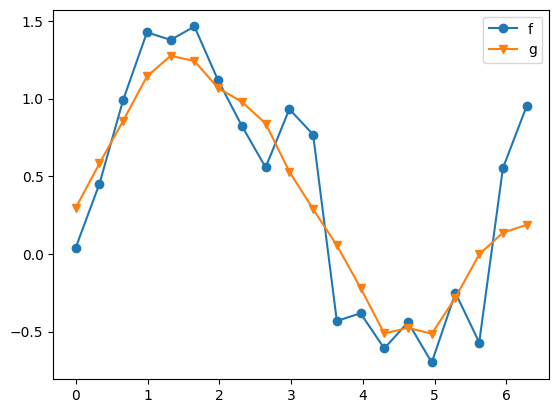

In [3]:
N = 20
x = np.linspace(0,2*np.pi,N)
f = np.sin(x) + np.random.random(N)
g = 1/5*np.array([1,1,1,1,1])
h = np.convolve(f,g,'same')

from matplotlib import pyplot as plt
plt.plot(x,f,marker='o',label='f')
plt.plot(x,h,marker='v',label='g')
plt.legend()
plt.show()

##### Convolution used to calculate the derivative of a function

<div class="intro">
    
The definition of the first [derivative](https://en.wikipedia.org/wiki/Derivative) of a function is:

$$f'(x)=\frac{df}{dx}=\lim_{h\rightarrow0}\frac{f(x)-f(x+h)}{h}$$

A "central" derivative can also be defined:

$$f'(x)=\frac{df}{dx}=\lim_{h\rightarrow0}\frac{f(x+h)-f(x+h)}{2h}$$

It can be approximated as ($h=1$):

$$f'(x)\approx \frac{1}{2}\left( f(x+1)-f(x-1) \right)$$

If you have a discretized function, *i.e.* $[... f(x_{k-2}),f(x_{k-1}),f(x_{k}), f(x_{k+1}), f(x_{k+2}) ...]$, the first derivative can be approximated as

$$f'(x_{k})\approx \frac{1}{2}\left( f(x_{k+1})-f(x_{k-1}) \right)$$

It can be calculated by a convolution, using the **[1,0,-1] kernel** (or **filter**)

</div>
<br>
<div class="app">

Let's consider the sin(*x*) function, which first derivative is cos(*x*)

**1.** Plot the sin(x) and cos(x) functions, between -2$\pi$ and 2$\pi$

**2.** Use the convolve operation with the [1,0,-1] kernel to calculate the first derivative of sin(*x*). Plot the resulting array. Comment?
</div>

In [4]:
from matplotlib import pyplot as plt
import numpy as np

# Q1: insert your code here


<div class="sol">

Want to see a possible answer to Q1? Uncomment the `# %load ./SolutionsToExercises/...` command below

</div>

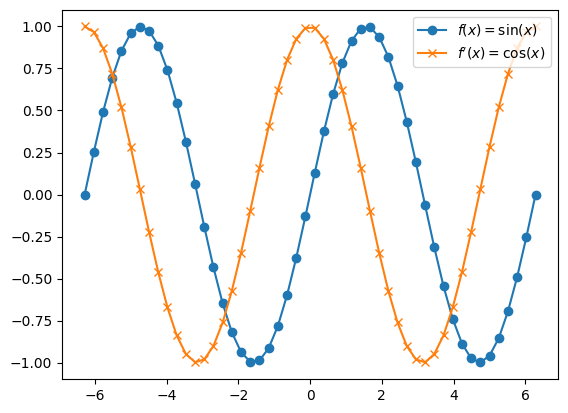

In [5]:
# %load ./SolutionsToExercises/ML/numDerivative_with_convolveQ1.py
N = 100
x = np.linspace(-2.*np.pi,2*np.pi)
f = np.sin(x)
fprime = np.cos(x)
plt.plot(x, f,marker='o',label='$f(x) = \sin(x)$')
plt.plot(x, fprime,marker='x',label='$f\'(x) = \cos(x)$')
plt.legend()
plt.show()


<div class="sol">

Want to see a possible answer to Q2? Uncomment the `# %load ./SolutionsToExercises/...` command below

</div>

In [6]:
# Q2: insert your code here


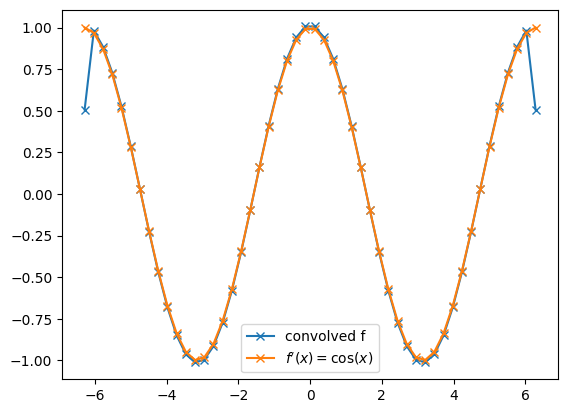

In [7]:
# %load ./SolutionsToExercises/ML/numDerivative_with_convolveQ2.py
K = 2*np.array([1,0,-1])

h = np.convolve(f,K,'same')
plt.plot(x, h,marker='x',label='convolved f')
fprime = np.cos(x)

plt.plot(x, fprime,marker='x',label='$f\'(x) = \cos(x)$')

plt.legend()
plt.show()


<div class="rqE">

There is a boundary effect, due to the `same` option. 

Let's apply the `np.convolve` operation, but with the `valid` and `full` options. **Check the lengths of the resulting functions before plotting!**
</div>

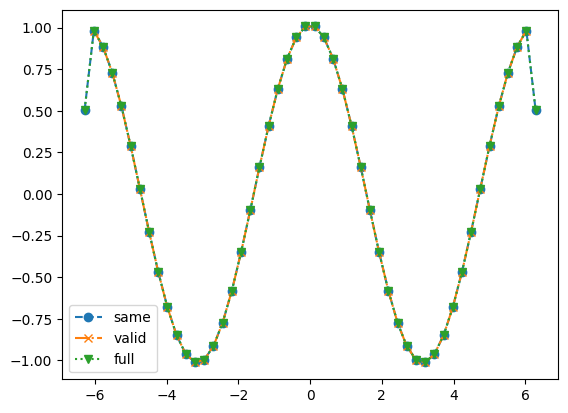

In [8]:
hsame = np.convolve(f,K,'same')
hvalid = np.convolve(f,K,'valid')
hfull = np.convolve(f,K,'full')
plt.plot(x[:], hsame,marker='o',linestyle='--', label='same')
plt.plot(x[1:-1], hvalid,marker='x',linestyle='-.', label='valid')
plt.plot(x[:], hfull[1:-1],marker='v',linestyle=':', label='full')
plt.legend()
plt.show()

##### Application of a pattern to a function

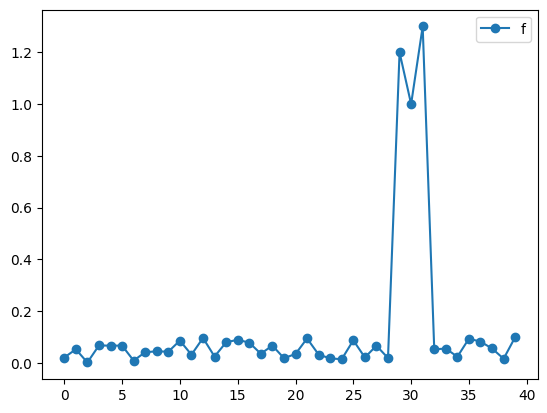

(0.0, 25.0)

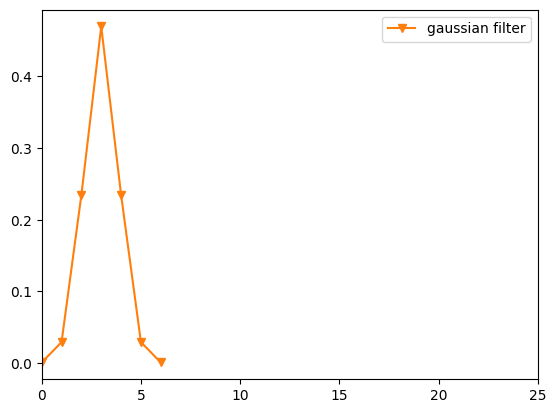

In [9]:
N = 40
f = np.zeros(N) + (np.random.random(N))/10
f[3*N//4-1] = 1.2
f[3*N//4] = 1
f[3*N//4+1] = 1.3
from matplotlib import pyplot as plt
plt.plot(f,marker='o',label='f')
plt.legend()
plt.show()
def gaussian(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2.))/(sigma*np.sqrt(2*np.pi))
mu = 3
fwhm = 2
sigma = fwhm/(2*np.sqrt(2*np.log(2)))
x = np.arange(mu-3,mu+4,1)
g = gaussian(x,mu,sigma)
plt.plot(x,g,marker='v',label="gaussian filter",color='C1')
plt.xlim(0,25)
plt.legend()


[0.02211347 0.03183503 0.03139881 0.05107126 0.06307245 0.05219312
 0.0327816  0.03521228 0.04360276 0.05316758 0.06212505 0.05969241
 0.06327458 0.05641613 0.06922315 0.08082122 0.07025645 0.05387751
 0.04742001 0.03617879 0.04543285 0.06098888 0.04276067 0.02427398
 0.03288204 0.05169698 0.04796817 0.07916613 0.3373926  0.84306969
 1.05906191 0.89468096 0.37412017 0.08569543 0.05124405 0.07205542
 0.07482643 0.05480864 0.04636094 0.0521164 ]


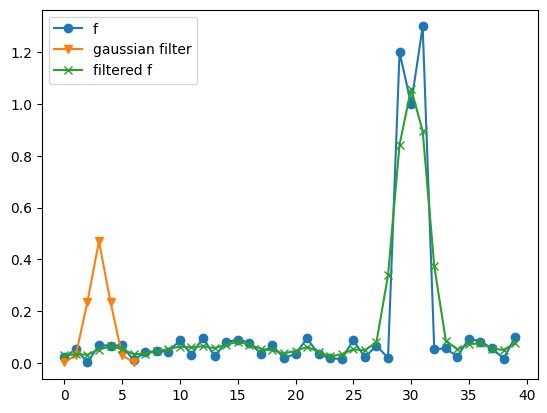

In [10]:
from scipy.ndimage import gaussian_filter1d
filtered_f = gaussian_filter1d(f,sigma)

filtered_f2 = np.convolve(f,g,mode='same')
print(filtered_f2)

plt.plot(f,marker='o',label="f")
plt.plot(g,marker='v',label="gaussian filter")
plt.plot(filtered_f, marker='x', label="filtered f")
plt.legend()

##### Find a pattern by a correlation study: application to radar detection

<div class="intro">

Another application is radar detection. Here's how it works: the radar emits a signal, the waves reach an object (an aircraft, for example) and are reflected back, and the radar receives this reflected signal. The time taken for the waves to make the round trip is used to calculate the distance to the object.

<img width="300px" src="./ML-Figures/RadarAntenna-DallE.png" style="display:block; margin-left:auto; margin-right:auto" id="radar"/>  


In practice, it's more complicated: the transmitted signal is well known, but the received signal, or echo, is made up of the reflected wave superimposed with random noise from the environment (clouds, birds, etc.).

The application of *correlation* is a good method to find the radar signal in the echo. Correlation is a similar operation to except that the kernel is not inverted. 

Let's first simulate the pulsed radar signal, *i.e.* the wave emitted by the radar. It will be the **kernel** 

</div>

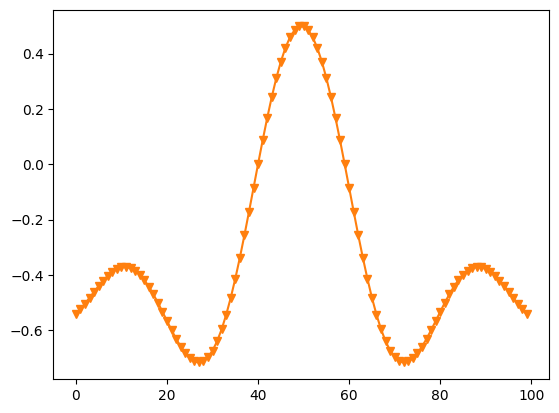

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def correlation(f,g):
    import numpy as np
    gg = np.flip(g)
    h = np.convolve(f,gg,'same')
    return h

# Generating a signal emitted by a radar
Nradar = 100
Xradar = np.linspace(-3.14,3.14,Nradar)
Yradar = np.sinc(Xradar) - 0.5
plt.plot(Yradar,color='C1',marker='v')
plt.show()



<div class="intro">

Let's now simulate a noisy signal, in order to generate the echo received by the radar.
</div>

<Figure size 1000x300 with 0 Axes>

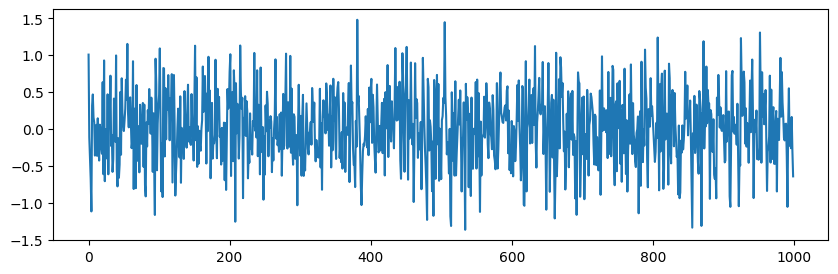

In [12]:
a, b, Nin = 0, 1000, 1000
Xin = np.linspace(a, b, Nin)
Yrandom = np.random.normal(0,1,Nin)/2
plt.figure(figsize=(10,3))
plt.plot(Yrandom)
plt.show()

<div class="intro">

Add now the pulsed radar single signal to the noisy signal, after a delay of 350 time steps. For that, we will use the [`pad` function of NumPy](https://numpy.org/doc/stable/reference/generated/numpy.pad.html).
</div>

<Figure size 1000x300 with 0 Axes>

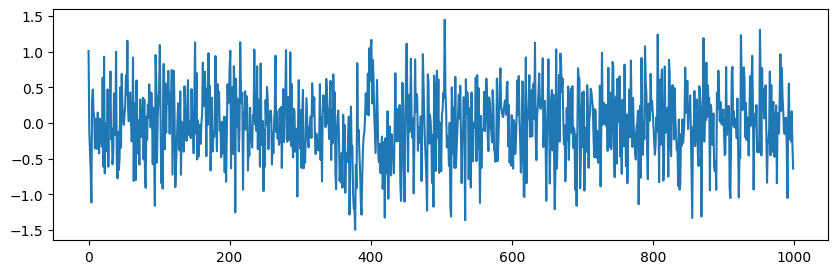

In [13]:
delay = 350
Yin = Yrandom + np.pad(Yradar,(delay,Nin-Nradar-delay),'constant', constant_values=(0, 0))
plt.figure(figsize=(10,3))
plt.plot(Yin,color='C0')
plt.show()

<div class="rqT" title="Compare the two signals">

At first sight, the difference between the two signals is not immediately noticeable. The radar echo, between t=350 and t=450, is well hidden in the noise..
</div>
<br>
<div class="intro">

Let's now filter the received signal by searching a correlation with the radar echo.
</div>

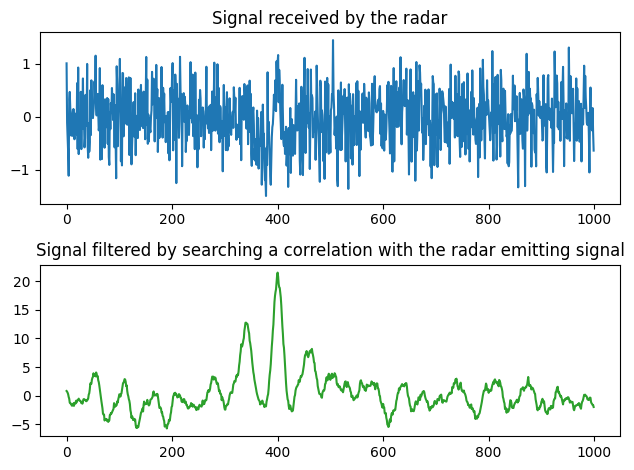

In [14]:
def affichage_correlation(f,g):
    gg = np.flip(g)
    h = np.convolve(f,gg,'same')

    ax = plt.subplot(2,1,1)
    ax.set_title("Signal received by the radar")
    plt.plot(f,color='C0')

    ax = plt.subplot(2,1,2)
    ax.set_title("Signal filtered by searching a correlation with the radar emitting signal")
    plt.plot(h,color='C2')

    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.95, hspace=1.0,wspace=0.5)
    plt.tight_layout()
    plt.show()
    return


affichage_correlation(Yin,Yradar)

<div class="rqE">

The observed peak corresponds to the signal returned by the aircraft. In the example, this signal is detected at position t=400. This makes possible the calculation of the distance from the radar to the aircraft
</div>

### 1D convolutional neural networks

<div class="intro">

**1D Convolutional Neural Networks** (**CNNs**) have recently become the state-of-the-art technique for crucial signal processing applications such as patient-specific ECG classification, structural health monitoring, anomaly detection in power electronics circuitry and motor-fault detection. Here is a general scheme:

<img width="40%" src="./DS4B-Slides/pngs/ZooNN/CNNwithLegend.svg" style="display:block; margin-left:auto; margin-right:auto" id="CNN"/>  

Convolutional layers are generally followed by "classical" dense layers.

</div>
<br>
<div class="rqE">

As you can see in the above scheme, the connectivity is not the same in the CNN part as in dense layers. Let's consider a 1D convolution window, *i.e.* the **kernel**, of size 3:

<img width="17%" src="./ML-Figures/CNNschematic.svg" style="display:block; margin-left:auto; margin-right:auto" id="CNNwithKernel"/>  

The content of a convolutional neuron is simply calculated as 

$$c=\sum_{i=m}^{m+K-1}w_{i}x_{i}$$

where $i$ runs over the kernel, of size $K$.

</div>

## Application to the classification of nanoparticles, on the basis of their RDF profile

### Context

<div class="introT" title="Introduction">

<img width="400px" src="./ML-Figures/RDFs/GTA_AI.png" style="display:block; margin-left:auto; margin-right:auto" id="GA"/>  
<br><br>

The **structure of nanomaterials** can directly influence their physical and chemical properties, that can be of interest for applications in various fields ranging from biology, medicine, optoelectronics, catalysis, energy, etc... Among nano-objects, colloidal transition metal nanoparticles (TMNPs) exhibit unique properties, often located between those of bulk materials and small clusters, and related to their size, shape, surface composition, surface or core defects. Thanks to the art of chemical synthesis, the metal core of TMNPs exhibit a fascinating variety of shapes, most of them being in fact Platonic, Archimedean, or Catalan solids, or even concave or convex polyhedra.

The **Radial Distribution Function** (RDF) $g(r)$ is another good fingerprint for materials science that encodes information about the whole atomic structure. It is experimentally obtained from **high energy X-ray diffraction**, a technique called Wide-Angle X-ray Scattering (**WAXS**). It is particularly well suited to discriminate in situ different crystalline structures and different shapes of NPs (see [*this article*](https://doi.org/10.1021/acs.chemrev.1c00237) and references therein). It is unique, continuous, differentiable with respect to atomic coordinates, invariant with respect to rotation, translation and nuclear permutation.

Provided that the atomic cartesian coordinates of various crystalline NPs be known, $g(r)$ can be simulated in real space for nanoparticles, modeled as attenuated bulk crystals:
$$g(r)=\frac{1}{r}\left[\frac{1}{N}\sum_{i}\sum_{j\neq i}\frac{b_{i}^{*}b_{j}}{<b>}\delta(r-r_{ij})\right]-4\pi r\rho_{0}\gamma_{0}$$

where:
- $b_i$ =  scattering power of atom *i*
- $\rho_0$ = average atom number density
- $\gamma_0$ = characteristic function describing the autocorrelation of the shape of the scattering domains in the material
- $\delta(r-r_{ij})$ = delta function, usually replaced by a Gaussian distribution function
</div>

#### Experimental profiles

rdf between 0.0 Å and 50.0 Å. Step = 0.01 Å. Number of values = 5001
First intense peak found at: 2.85 Å. g(r) = 3.47


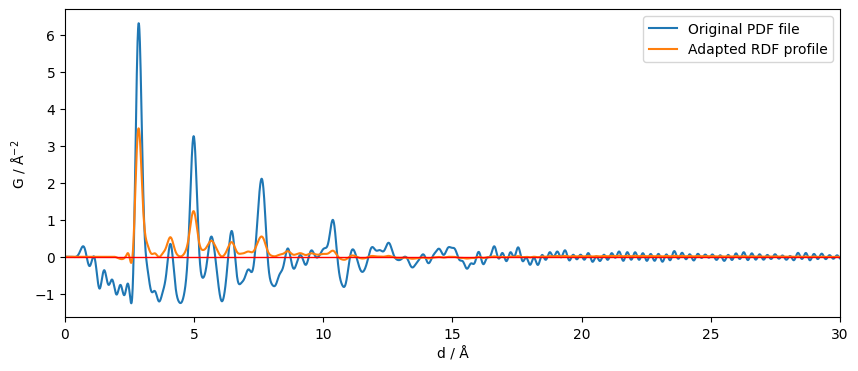

rdf between 0.0 Å and 30.0 Å. Step = 0.01 Å. Number of values = 3001
First intense peak found at: 2.85 Å. g(r) = 3.39


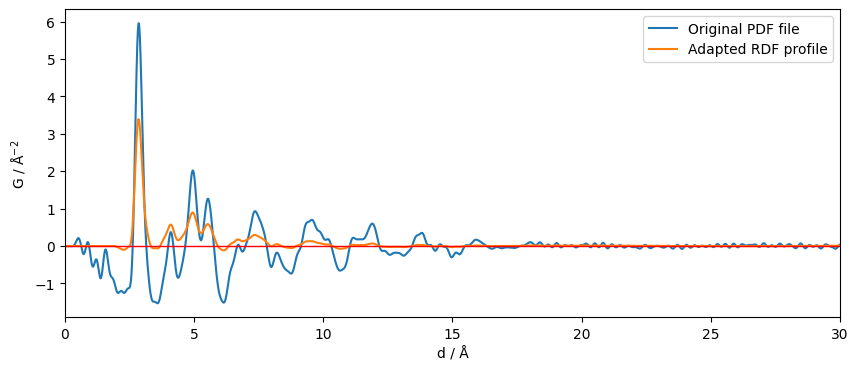

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from scipy.signal import find_peaks
pathway2rdfExp = "./ML-data/RDFs/expRDF/"

#########################################################################################################################################

t4pPC.centertxt("RDF of a pentagonal bipyramid AuNP (recorded by N. Ratel-Ramond, LPCNO, Toulouse, France)",size=14,weight='bold')
_,grDecaOrg = np.genfromtxt(pathway2rdfExp+"AuNP-CGSR_021_decahedron.csv", delimiter="\t", unpack=True, skip_header=1)
rDeca,grDeca = np.genfromtxt(pathway2rdfExp+"AuNP-CGSR_021_decahedron_corrected.csv", delimiter="\t", unpack=True, skip_header=1)
print(f"rdf between {rDeca[0]} Å and {rDeca[-1]} Å. Step = {rDeca[1]-rDeca[0]} Å. Number of values = {len(rDeca)}")
peaksDeca, _ = find_peaks(grDeca,height=1)
print(f"First intense peak found at: {rDeca[peaksDeca[0]]:.2f} Å. g(r) = {grDeca[peaksDeca[0]]:.2f}")

_ = plt.figure(figsize=(10,4))
_ = plt.plot(rDeca,grDecaOrg,label="Original PDF file")
_ = plt.plot(rDeca,grDeca,label="Adapted RDF profile")
_ = plt.xlabel("d / Å")
_ = plt.ylabel("G / Å$^{-2}$")
_ = plt.legend()
_ = plt.axhline(y=0,linewidth=1,color='r')
_ = plt.xlim(0,30)
_ = plt.show()

#########################################################################################################################################

t4pPC.centertxt("RDF of an icosahedral AuNP (recorded by N. Ratel-Ramond, LPCNO, Toulouse, France)",size=14,weight='bold')
_,grIcoOrg = np.genfromtxt(pathway2rdfExp+"AuNP-NS_Ti25C_1000_0001_0001_icosahedron.csv", delimiter="\t", unpack=True, skip_header=1)
rIco,grIco = np.genfromtxt(pathway2rdfExp+"AuNP-NS_Ti25C_1000_0001_0001_icosahedron_corrected.csv", delimiter="\t", unpack=True, skip_header=1)
print(f"rdf between {rIco[0]} Å and {rIco[-1]} Å. Step = {rIco[1]-rIco[0]} Å. Number of values = {len(rIco)}")
peaksIco, _ = find_peaks(grIco,height=1)
print(f"First intense peak found at: {rIco[peaksIco[0]]:.2f} Å. g(r) = {grIco[peaksIco[0]]:.2f}")

_ = plt.figure(figsize=(10,4))
_ = plt.plot(rIco,grIcoOrg,label="Original PDF file")
_ = plt.plot(rIco,grIco,label="Adapted RDF profile")
_ = plt.xlabel("d / Å")
_ = plt.ylabel("G / Å$^{-2}$")
_ = plt.legend()
_ = plt.axhline(y=0,linewidth=1,color='r')
_ = plt.xlim(0,30)
_ = plt.show()

#### Identification of the shape of NPs on the basis of experimental RDF profiles

A database of 11 classes of nanoparticles (NPs) was built separately with the in-house `pyNanoMatBuilder` library. This library creates the atomic coordinates of NPs with a given crystal structure by specifying either the shape, or by making a Wulff construction. 

The classes (bcc cube, bcc regular dodecahedron, cuboctahedron, dodecahedron, fcc cube, fcc truncated octahedron, fcc dihedral rhombic dodecahedron, hcp sphere, icosahedron, pentagonal bipyramid, fcc octahedron) are summarized below.. There is one line per class, 4 to 5 NPs of different sizes were considered for each class. **Data augmentation** was applied for each size by randomly moving each atom around its equilibrium position, resulting in 20 RDF variants per class and per size. Only the RDF (black), and its first derivative (blue), of the generating NP is displayed in the figure below.  
<img width="95%" src="./ML-Figures/RDFs/rdf_grid-C.png" style="display:block; margin-left:auto; margin-right:auto" id="libRDFs"/> 
</div>

#### Data augmentation?

Run the cell below to see the 21 RDF variants for the 309-atoms (*i.e.* 4 shells) icosahedron
</div>

dfFico. Structure (shape) :(1387, 106)


,r,ico_020_000,ico_020_001,ico_020_002,ico_020_003,ico_020_004,ico_020_005,ico_020_006,ico_020_007,ico_020_008,...,ico_060_011,ico_060_012,ico_060_013,ico_060_014,ico_060_015,ico_060_016,ico_060_017,ico_060_018,ico_060_019,ico_060_020
0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,34.550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1383,34.575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1384,34.600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1385,34.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The csv file contains 105 RDF profiles, including 21 for the 309-atoms icosahedron, plotted below


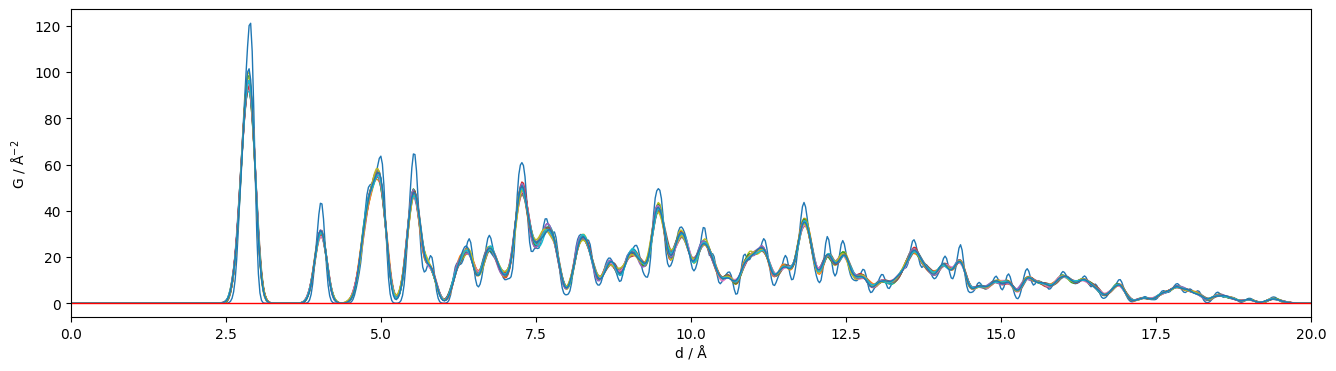

In [16]:
from matplotlib import pyplot as plt
import pandas as pd

pathway = "./ML-data/RDFs/simulRDF/"
csv1DFico = pathway+"RDF_profiles_ico.csv"

if os.path.exists(csv1DFico):
    dfFico=pd.read_csv(csv1DFico, sep="\t", index_col = 0) 
    print(f"dfFico. Structure (shape) :{dfFico.shape}")
    display(dfFico)
else:
    print(f'{csv1DFico} was not found')
    print('Create first this csv file, by running the codes of the appendix of the present notebook') 

dfFico309 = dfFico.filter(regex='ico_040_|r')
print(f"{bg.DARKREDB}The csv file contains {dfFico.shape[1]-1} RDF profiles, including {dfFico309.shape[1]-1} for the 309-atoms icosahedron, plotted below")
Y = list(dfFico309.columns)
Y.remove('r')

_ = plt.figure(figsize=(16,4))
for y in Y:
    _ = plt.plot(dfFico309['r'],dfFico309[y],lw=1)
    _ = plt.xlabel("d / Å")
    _ = plt.ylabel("G / Å$^{-2}$")
_ = plt.axhline(y=0,linewidth=1,color='r')
_ = plt.xlim(0,20)
_ = plt.show()

#### Comparaison of the experimental profiles with simulated RDF profiles of some structures

dfF. Structure (shape) :(1387, 106)
The RDF_profiles_ico.csv csv file contains 105 RDF profiles, including one perfectly symmetric 147-atoms icosahedron, plotted below
dfF. Structure (shape) :(1211, 106)
The RDF_profiles_pbpy.csv csv file contains 105 RDF profiles, including one perfectly symmetric 105-atoms decahedron, plotted below
dfF. Structure (shape) :(983, 106)
The RDF_profiles_Oh.csv csv file contains 105 RDF profiles, including one perfectly symmetric 146-atoms octahedron, plotted below


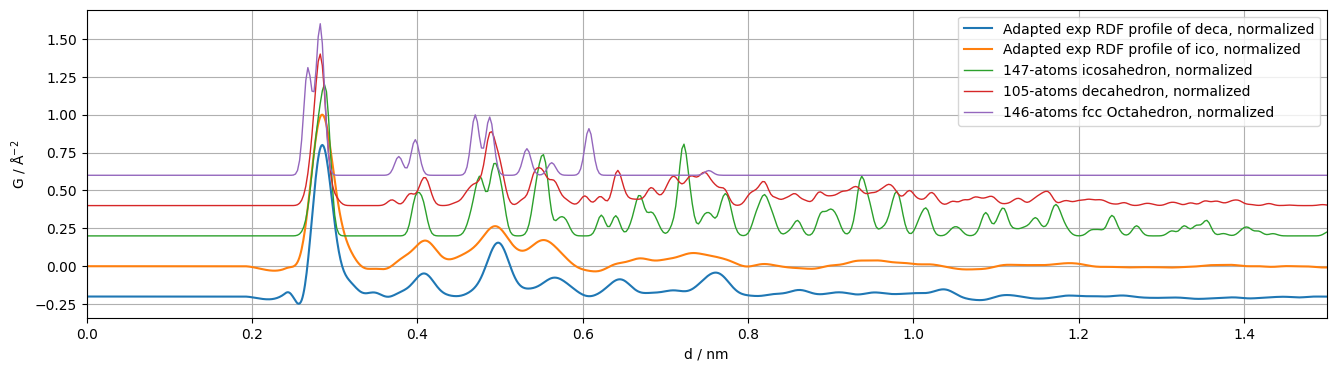

In [17]:
from matplotlib import pyplot as plt
import pandas as pd

pathway = "./ML-data/RDFs/simulRDF/"

def readRDF(pathway, file, show=False):
    csv1DF = pathway + file
    if os.path.exists(csv1DF):
        dfF=pd.read_csv(csv1DF, sep="\t", index_col = 0) 
        print(f"dfF. Structure (shape) :{dfF.shape}")
        if show: display(dfF)
    else:
        print(f'{csv1DF} was not found')
        print('Create first this csv file, by running the codes of the appendix of the present notebook') 
    return dfF

dfFico = readRDF(pathway,"RDF_profiles_ico.csv")
dfFico147 = dfFico.filter(regex='ico_030_|r')
print(f"{bg.DARKREDB}The RDF_profiles_ico.csv csv file contains {dfFico.shape[1]-1} RDF profiles, including one perfectly symmetric 147-atoms icosahedron, plotted below{bg.OFF}")

dfFpbpy = readRDF(pathway,"RDF_profiles_pbpy.csv")
dfFpbpy105 = dfFpbpy.filter(regex='pbpy_040_|r')
print(f"{bg.DARKREDB}The RDF_profiles_pbpy.csv csv file contains {dfFpbpy.shape[1]-1} RDF profiles, including one perfectly symmetric 105-atoms decahedron, plotted below{bg.OFF}")

dfFOh = readRDF(pathway,"RDF_profiles_Oh.csv")
dfFOh146 = dfFOh.filter(regex='regfccOh_050_|r')
print(f"{bg.DARKREDB}The RDF_profiles_Oh.csv csv file contains {dfFOh.shape[1]-1} RDF profiles, including one perfectly symmetric 146-atoms octahedron, plotted below{bg.OFF}")

_ = plt.figure(figsize=(16,4))
_ = plt.plot(rDeca/10,-0.2+grDeca/np.max(grDeca),label="Adapted exp RDF profile of deca, normalized")
_ = plt.plot(rIco/10,grIco/np.max(grIco),label="Adapted exp RDF profile of ico, normalized")
_ = plt.plot(dfFico147['r']/10,0.2+dfFico147.iloc[:, 1]/dfFico147.iloc[:, 1].max(),lw=1,label="147-atoms icosahedron, normalized") # column 0 = r, column 1 = perfectly symmetrical icoshadron, without random atomic displacement
_ = plt.plot(dfFpbpy105['r']/10,0.4+dfFpbpy105.iloc[:, 1]/dfFpbpy105.iloc[:, 1].max(),lw=1,label="105-atoms decahedron, normalized")
_ = plt.plot(dfFOh146['r']/10,0.6+dfFOh146.iloc[:, 1]/dfFOh146.iloc[:, 1].max(),lw=1,label="146-atoms fcc Octahedron, normalized")
_ = plt.xlabel("d / nm")
_ = plt.ylabel("G / Å$^{-2}$")
_ = plt.xlim(0,1.5)
_ = plt.legend()
_ = plt.grid()
_ = plt.show()

<div class="exE" title="3D shape of these 3 NPs">

Use the `molView` class developped and used in the [MolecularRepresentations-Nano.ipynb notebook](MolecularRepresentations-Nano.ipynb) to display these three structures, saved in the `./ML-data/RDFs/coords_3DNPs/` folder, under the names:
- `ico_030_000.xyz`
- `pbpy_040_000.xyz`
- `regfccOh_050_000.xyz`

**Hint.** a `molView` class, developped in the [Representation and Metadata Generation of \[Nano\]materials for Machine Learning notebook](MolecularRepresentations-Nano.ipynb) is also available in the `tools4pyPhysChem utility`, aka `t4pPC`, which is imported in the very first cell of this notebook. Type the command `help(t4pPC.molView)` to read the documentation.
</div>

In [18]:
# Enter your code here


<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below, and then run the cell twice (one to load the python code, the second one to run it)

</div>

In [4]:
# %load ./SolutionsToExercises/ML/viewNP.py

### Definition of useful functions

In [20]:
def plotEpochs(history,metrics):
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    # c'est pratique d'utiliser un dataframe et les fonctions de tracé associées
    df=pd.DataFrame(data=history.history)

    nEpoch = df.shape[0]
    print(nEpoch)
    
    plt.rcParams["figure.figsize"] = (8,4)
    # on va d'abord tracer les courbes de la fonction qui a été minimisée au cours de l'apprentissage
    figLOSS=df.plot(y=["loss","val_loss"],linestyle='-', marker='o',fontsize=14)
    figLOSS.set_xlabel('epoch',fontdict={'fontsize':16})
    figLOSS.set_ylabel('loss',fontdict={'fontsize':16})
    yMin = np.min(df[["loss","val_loss"]].iloc[nEpoch//3:nEpoch,:].to_numpy())
    yMax = np.max(df[["loss","val_loss"]].iloc[nEpoch//3:nEpoch,:].to_numpy())
    yMin = round(yMin-0.05,1)
    yMax = round(yMax+0.05,1)
    print(yMin,yMax)
    figLOSS.set_ylim([yMin,yMax])
    figLOSS.legend(loc='upper right', shadow=True, fontsize='x-large')
    plt.show()

    for i in range(len(metrics)):
        ErrTraining = metrics[i]
        ErrVal = "val_" + ErrTraining
        figACC=df.plot(y=[ErrTraining,ErrVal],linestyle='-', marker='o',fontsize=14)
        figACC.set_xlabel('epoch',fontdict={'fontsize':16})
        figACC.set_ylabel(ErrTraining,fontdict={'fontsize':16})
        yMin = np.min(df[[ErrTraining,ErrVal]].iloc[nEpoch//3:nEpoch,:].to_numpy())
        yMax = np.max(df[[ErrTraining,ErrVal]].iloc[nEpoch//3:nEpoch,:].to_numpy())
        yMin = round(yMin-0.05,1)
        yMax = round(yMax+0.05,1)
        print(yMin,yMax)
        figACC.set_ylim([yMin,yMax])
        figACC.legend(loc='lower right', shadow=True, fontsize='x-large')
        plt.show()

def printAcc(model, x_train, y_train, x_test, y_test):
    evalANN_on_TrainSet = model.evaluate(x_train, y_train, verbose=0)
    print(f"{color.GREEN}x_train / loss      : {evalANN_on_TrainSet[0]:5.4f}{color.OFF}")
    print(f"{color.GREEN}x_train / accuracy  : {evalANN_on_TrainSet[1]:5.4f}{color.OFF}")
    print(f"{color.GREEN}x_train / mae       : {evalANN_on_TrainSet[2]:5.4f}{color.OFF}")
    print()
    evalANN_on_TestSet = model.evaluate(x_test, y_test, verbose=0)
    print(f"{color.BLUE} x_test / loss      : {evalANN_on_TestSet[0]:5.4f}{color.OFF}")
    print(f"{color.BLUE} x_test / accuracy  : {evalANN_on_TestSet[1]:5.4f}{color.OFF}")
    print(f"{color.BLUE} x_test / mae       : {evalANN_on_TestSet[2]:5.4f}{color.OFF}")

def plotConfusionMatrix(y_trainC, y_trainC_hat, y_testC, y_testC_hat, uv, saveSVGImg=None):
    from sklearn.metrics import ConfusionMatrixDisplay
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    import seaborn as sns
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    
    cm_labels = uv
    cm_tr = confusion_matrix(np.argmax(y_trainC_hat,axis=1),np.argmax(y_trainC.to_numpy(),axis=1))
    cm_tt = confusion_matrix(np.argmax(y_testC_hat,axis=1),np.argmax(y_testC.to_numpy(),axis=1))

    cm2i = 1/2.54
    widthSize = len(uv)*cm2i*1.5
    fig=plt.figure(figsize=(2*widthSize,widthSize*0.8))
    gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])
    
    ax00 = fig.add_subplot(gs[0, 0], title="Training set. Confusion Matrix")
    sns.heatmap(pd.DataFrame(cm_tr, columns=cm_labels, index=cm_labels), ax=ax00, cmap=plt.cm.Blues, annot = True)
    ax00.set_xlabel("real", fontsize = 20)
    ax00.set_ylabel("predicted", fontsize = 20)
    
    ax01=fig.add_subplot(gs[0, 1], title="Test set. Confusion Matrix")
    sns.heatmap(pd.DataFrame(cm_tt, columns=cm_labels, index=cm_labels), ax=ax01, cmap=plt.cm.Blues, annot = True)
    ax01.set_xlabel("real", fontsize = 20)
    ax01.set_ylabel("predicted", fontsize = 20)
    if saveSVGImg is not None:
        plt.savefig(saveSVGImg, format='svg', dpi=600)
    plt.show()

    atr = accuracy_score(np.argmax(y_trainC.to_numpy(),axis=1),np.argmax(y_trainC_hat,axis=1))
    att = accuracy_score(np.argmax(y_testC.to_numpy(),axis=1),np.argmax(y_testC_hat,axis=1))
    maetr = mean_absolute_error(np.argmax(y_trainC.to_numpy(),axis=1),np.argmax(y_trainC_hat,axis=1))
    maett = mean_absolute_error(np.argmax(y_testC.to_numpy(),axis=1),np.argmax(y_testC_hat,axis=1))
    msetr = mean_squared_error(np.argmax(y_trainC.to_numpy(),axis=1),np.argmax(y_trainC_hat,axis=1))
    msett = mean_squared_error(np.argmax(y_testC.to_numpy(),axis=1),np.argmax(y_testC_hat,axis=1))
    print(f"{hl.BOLD}{fg.BLUE}                Accurracy       MAE         MSE")
    print(f"{hl.BOLD}{fg.PURPLE} Training set.      {atr:.2f}        {maetr:.2f}        {msetr:.2f}")
    print(f"{hl.BOLD}{fg.GREEN}     Test set.      {att:.2f}        {maett:.2f}        {msett:.2f}")
    return

def rescale1D(x,f,peakref,xmax,dxTarget):
    import numpy as np
    dx = x[1]-x[0]
    f = f/f[peakref]
    x = x/x[peakref]
    xmaxTarget = xmax / x[peakref]
    xnew = np.arange(0,xmaxTarget,dxTarget)
    ynew = np.interp(xnew, x, f)
    return xnew,ynew

### Data

#### Read the data



In [21]:
import pandas as pd
import numpy as np

import os

pathway = "./ML-data/RDFs/simulRDF/"
csv1DF = pathway+"RDF_profiles.csv"
csv1DL = pathway+"RDF_labels.csv"

if os.path.exists(csv1DF) and os.path.exists(csv1DL):
    dfF=pd.read_csv(csv1DF, sep="\t", index_col = 0) 
    dfY=pd.read_csv(csv1DL, sep="\t", index_col = 0) 
    print(f"dfF. Structure (shape) :{dfF.shape}")
    print(f"dfY. Structure (shape) :{dfY.shape}")
    display(dfF)
    display(dfY)
else:
    print(f'{csv1DF} and/or {csv1DL} were not found')
    print('Create first these files, by running the codes of the appendix of the present notebook') 

dfF. Structure (shape) :(2541, 1030)
dfY. Structure (shape) :(1029, 1)


,r,hcpsph2_000_000,hcpsph2_000_001,hcpsph2_000_002,hcpsph2_000_003,hcpsph2_000_004,hcpsph2_000_005,hcpsph2_000_006,hcpsph2_000_007,hcpsph2_000_008,...,bccCube_030_011,bccCube_030_012,bccCube_030_013,bccCube_030_014,bccCube_030_015,bccCube_030_016,bccCube_030_017,bccCube_030_018,bccCube_030_019,bccCube_030_020
0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,63.400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2537,63.425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2538,63.450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2539,63.475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,F
hcpsph2_000_000,hcpsph2
hcpsph2_000_001,hcpsph2
hcpsph2_000_002,hcpsph2
hcpsph2_000_003,hcpsph2
hcpsph2_000_004,hcpsph2
...,...
bccCube_030_016,bccCube
bccCube_030_017,bccCube
bccCube_030_018,bccCube
bccCube_030_019,bccCube


#### Standardization of the data and one-hot-encoding of the polynomial type

<div class="app">

Analyze carefully what is done in the next cell. 
</div>

In [22]:
RDFcols = list(dfF.columns)
RDFcols.remove('r')
dfFS = dfF.copy()
dfFS = dfFS.drop('r',axis='columns')
for nameRDF in RDFcols:
    peaks, _ = find_peaks(dfFS[nameRDF],height=1)
    peakRef = peaks[0]
    # print(peaks[0], rvalues[peaks[0]],dfFS[nameRDF].iloc[peaks[0]])
    dfFS[nameRDF] = dfFS[nameRDF]/dfFS[nameRDF].iloc[peaks[0]]

deltaR = dfF['r'].iloc[1] - dfF['r'].iloc[0]
Rmax = 30
nrows = int(Rmax / deltaR)
print(f"{bg.LIGHTBLUEB}Keeping {nrows} rows, such that Rmax = {Rmax} Å (δr = {deltaR} Å)")
dfFS = dfFS.iloc[np.linspace(0,nrows,nrows)]
display(dfFS)
display(dfFS.describe().style.format("{0:.2f}").set_caption("Training set after rescaling wrt intensity"))
dfFS = dfFS.T

Keeping 1200 rows, such that Rmax = 30 Å (δr = 0.025 Å)


,hcpsph2_000_000,hcpsph2_000_001,hcpsph2_000_002,hcpsph2_000_003,hcpsph2_000_004,hcpsph2_000_005,hcpsph2_000_006,hcpsph2_000_007,hcpsph2_000_008,hcpsph2_000_009,...,bccCube_030_011,bccCube_030_012,bccCube_030_013,bccCube_030_014,bccCube_030_015,bccCube_030_016,bccCube_030_017,bccCube_030_018,bccCube_030_019,bccCube_030_020
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.285082,0.281527,0.289800,0.280702,0.280062,0.285293,0.288153,0.283656,0.289591,0.284176
1196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.282387,0.278949,0.287122,0.278506,0.277731,0.282392,0.286230,0.280761,0.286657,0.282063
1197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.279482,0.276413,0.283794,0.276240,0.275589,0.278879,0.283459,0.277773,0.283376,0.279662
1198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.276705,0.274313,0.281084,0.274308,0.273683,0.275281,0.280095,0.275208,0.280467,0.277697


<div class="app">

Why has the dfFS dataframe been transposed in the previous cell (`dfFS = dfFS.T`)?
</div>

In [23]:
nlines = dfFS.shape[0]
ncols = dfFS.shape[1]
dfFS["F"]=dfY["F"]
display(dfFS)

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1200,F
hcpsph2_000_000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,hcpsph2
hcpsph2_000_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,hcpsph2
hcpsph2_000_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,hcpsph2
hcpsph2_000_003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,hcpsph2
hcpsph2_000_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,hcpsph2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bccCube_030_016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.279767,0.283861,0.286458,0.286880,0.285293,0.282392,0.278879,0.275281,0.269875,bccCube
bccCube_030_017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.282974,0.286026,0.288170,0.288896,0.288153,0.286230,0.283459,0.280095,0.273456,bccCube
bccCube_030_018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.282133,0.285064,0.286354,0.285755,0.283656,0.280761,0.277773,0.275208,0.272085,bccCube
bccCube_030_019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.285179,0.288509,0.290781,0.291183,0.289591,0.286657,0.283376,0.280467,0.276450,bccCube


<div class="app">

What is one hot encoding?
</div>

In [24]:
uv = dfFS["F"].unique()
print(f"{len(uv):2} unique categories: {uv}") 
mapc2i = {}
for x in range(len(uv)):
    mapc2i[uv[x]] = x
print(f"One-hot-encoding = correspondence between a unique category and an integer number: {mapc2i}")
F_ohe = t4pPC.y2c(mapc2i,dfFS["F"])
dfohe = pd.DataFrame(F_ohe,columns=uv,index=dfFS.index)
dfFSohe = pd.concat([dfFS,dfohe],axis=1)
# col = dfFSohe.pop('order')
# dfFSohe.insert(dfFSohe.shape[1], col.name, col)
display(dfFSohe)

del dfohe,dfFS,mapc2i

11 unique categories: ['hcpsph2' 'fccCube' 'regfccOh' 'bccrDD' 'cubo' 'pbpy' 'fccdrDD' 'dd'
 'fccTrOh' 'ico' 'bccCube']
One-hot-encoding = correspondence between a unique category and an integer number: {'hcpsph2': 0, 'fccCube': 1, 'regfccOh': 2, 'bccrDD': 3, 'cubo': 4, 'pbpy': 5, 'fccdrDD': 6, 'dd': 7, 'fccTrOh': 8, 'ico': 9, 'bccCube': 10}


2025-09-27 22:16:38.301889: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-27 22:16:38.302197: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-27 22:16:38.344361: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-27 22:16:39.675208: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

,0,1,2,3,4,5,6,7,8,9,...,fccCube,regfccOh,bccrDD,cubo,pbpy,fccdrDD,dd,fccTrOh,ico,bccCube
hcpsph2_000_000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hcpsph2_000_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hcpsph2_000_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hcpsph2_000_003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hcpsph2_000_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bccCube_030_016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
bccCube_030_017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
bccCube_030_018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
bccCube_030_019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Construction of the training and test sets

<div class="app">

What is the purpose of `frac=0.8`, in the first line?
</div>

In [25]:
data_train = dfFSohe.sample(frac=0.8, axis='index', random_state=42)
data_test  = dfFSohe.drop(data_train.index) 
# catY = np.concatenate((["F"],uv,["order"]))
catY = np.concatenate((["F"],uv))
x_train = data_train.drop(catY,axis=1)
x_test = data_test.drop(catY,axis=1)
# for function classification
y_train = data_train[uv]
y_test = data_test[uv]
# for the identification of the order of the polynomial
# yOrder_train = data_train["order"]
# yOrder_test = data_test["order"]
#
t4pPC.centerTitle("Training set")
display(x_train)
display(y_train)
# display(yOrder_train[0:5])
t4pPC.centerTitle("Test set")
display(x_test)
display(y_test)
# display(yOrder_test[0:5])

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1200
bccrDD_020_017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pbpy_050_009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
regfccOh_060_009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fccCube_020_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cubo_050_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pbpy_020_010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bccrDD_050_011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.863855e-07,0.000001,0.000005,0.000016,0.000044,0.000101,0.000194,0.000317,0.000461,0.000802
pbpy_040_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fccdrDD_050_009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.513568e-03,0.004142,0.004640,0.004895,0.004911,0.004715,0.004331,0.003823,0.003301,0.002656


,hcpsph2,fccCube,regfccOh,bccrDD,cubo,pbpy,fccdrDD,dd,fccTrOh,ico,bccCube
bccrDD_020_017,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pbpy_050_009,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
regfccOh_060_009,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fccCube_020_002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cubo_050_005,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
pbpy_020_010,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
bccrDD_050_011,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pbpy_040_001,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
fccdrDD_050_009,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1200
hcpsph2_000_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hcpsph2_000_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hcpsph2_000_013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hcpsph2_000_014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hcpsph2_000_020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bccCube_020_014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bccCube_030_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.281491,0.284165,0.286324,0.287739,0.288166,0.287392,0.285427,0.282598,0.279450,0.274500
bccCube_030_007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.280764,0.283435,0.285288,0.286145,0.285966,0.284773,0.282683,0.279945,0.277025,0.273548
bccCube_030_011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.282472,0.286245,0.288212,0.288397,0.287208,0.285082,0.282387,0.279482,0.276705,0.272440


,hcpsph2,fccCube,regfccOh,bccrDD,cubo,pbpy,fccdrDD,dd,fccTrOh,ico,bccCube
hcpsph2_000_001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hcpsph2_000_004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hcpsph2_000_013,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hcpsph2_000_014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hcpsph2_000_020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
bccCube_020_014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
bccCube_030_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
bccCube_030_007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
bccCube_030_011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### First model: supervised learning of the polynomial type = classification with dense layers only

#### Definition and compilation of the model

<div class="app">

**1.** Analyze the `modelCD` model defined below. Is it:
- a dense NN?
- a convolutional NN?
- deep learning?

**2.** Why is it the `categorical_crossentropy` loss function that is used?
</div>

nFeatures = 1200


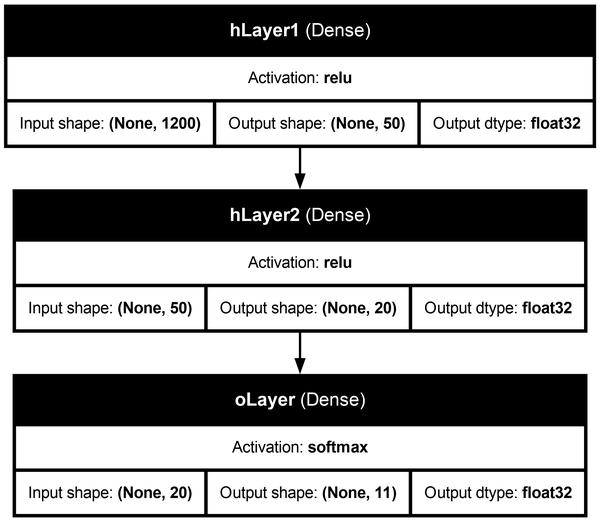

In [31]:
import tensorflow as tf
from tensorflow import keras

nFeatures = x_train.shape[1]
print(f"nFeatures = {nFeatures}")
modelCD = keras.models.Sequential() #modelCD as classification with dense layers
modelCD.add(keras.layers.Input((nFeatures,), name='iLayer'))
modelCD.add(keras.layers.Dense(50, activation='relu', name='hLayer1'))
modelCD.add(keras.layers.Dense(20, activation='relu', name='hLayer2'))
modelCD.add(keras.layers.Dense(len(uv), activation='softmax', name='oLayer'))

metrics = ['accuracy','mae']

modelCD.compile(optimizer = 'adam',
              loss      = 'categorical_crossentropy',
              metrics   = metrics )

from tensorflow.keras.utils import plot_model
fig = plot_model(modelCD, dpi=300, show_dtype=True , show_shapes=True, show_layer_names=True, show_layer_activations=True)
t4pPC.displayModel(fig, width = 600)


#### Training

In [32]:
# Resets all state generated by Keras
tf.keras.backend.clear_session()

vID.chrono_start()
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=10, min_lr=0.001)
modelCD.summary()
vID.chrono_start()
historyCD = modelCD.fit(x_train,
                      y_train,
                      epochs          = 200,
                      batch_size      = 10,
                      verbose         = 1,
                      validation_data = (x_test, y_test),
                      callbacks=[es,reduce_lr])
vID.chrono_show()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hLayer1 (Dense)                 │ (None, 50)             │        60,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hLayer2 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ oLayer (Dense)                  │ (None, 11)             │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,301 (239.46 KB)

 Trainable params: 61,301 (239.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3354 - loss: 1.9016 - mae: 0.1451 - val_accuracy: 0.5583 - val_loss: 1.4941 - val_mae: 0.1294 - learning_rate: 0.0010
Epoch 2/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6513 - loss: 1.2114 - mae: 0.1121 - val_accuracy: 0.6990 - val_loss: 1.0436 - val_mae: 0.1017 - learning_rate: 0.0010
Epoch 3/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7230 - loss: 0.8864 - mae: 0.0886 - val_accuracy: 0.7039 - val_loss: 0.8469 - val_mae: 0.0876 - learning_rate: 0.0010
Epoch 4/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7679 - loss: 0.7253 - mae: 0.0762 - val_accuracy: 0.7573 - val_loss: 0.7287 - val_mae: 0.0760 - learning_rate: 0.0010
Epoch 5/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8019 - loss: 0.6088 - mae: 0.0662 - val_accuracy: 0.8058 - val_loss: 0.5897 - val_mae: 0.0661 - learning_rate: 0.0010
Epoch 6/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8408 - loss: 0.5318 

#### Evaluation of the accuracy

153
-0.0 0.5


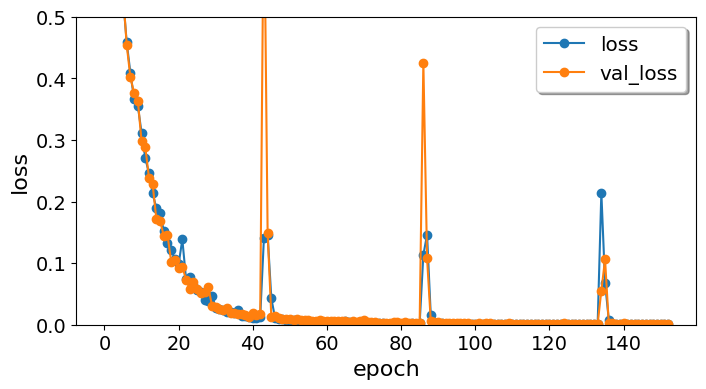

0.9 1.0


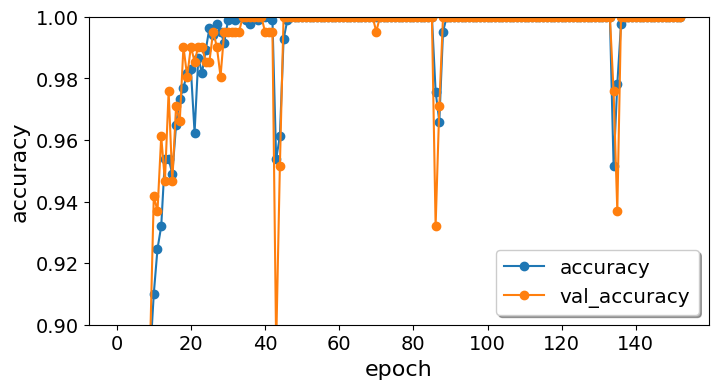

-0.0 0.1


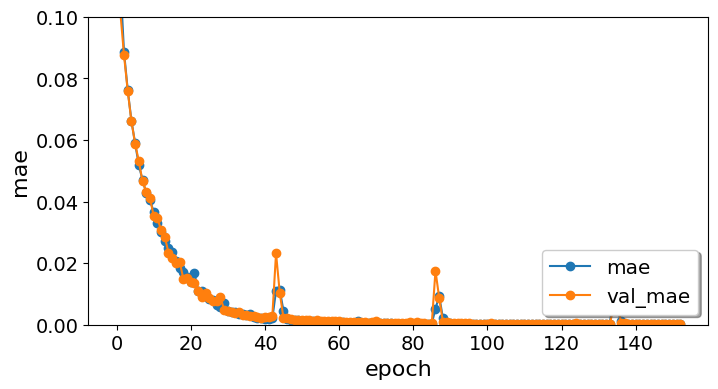

In [33]:
plotEpochs(historyCD,metrics)

In [34]:
printAcc(modelCD, x_train, y_train, x_test, y_test)

x_train / loss      : 0.0004
x_train / accuracy  : 1.0000
x_train / mae       : 0.0001

 x_test / loss      : 0.0011
 x_test / accuracy  : 1.0000
 x_test / mae       : 0.0002


In [35]:
print(x_train.shape)

(823, 1200)


<div class='introT' title = "Confusion matrices">

Let's first consider a test, such as a blood test, that returns either YES (the patient has syndrome XX)  or NO (the patient does not have the suspected syndrome). A confusion matrix is a table used to investigate the performance of a classification model where the actual test values are known. It has two rows and two columns describing the **true positives**, **false positives**, **false negatives** and **true negatives**:

<img width="300px" src="./DS4B-svg/2by2ConfusionMatrix.svg" style="display:block; margin-left:auto; margin-right:auto" id="CNN"/> 

In the field of machine learning and specifically the problem of statistical classification, a **confusion matrix**, also known as **error matrix** is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one.

Each column of the matrix represents the instances in an actual class while each row represents the instances in a predicted class, or vice versa &ndash; both variants are found in the literature.
</div>


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


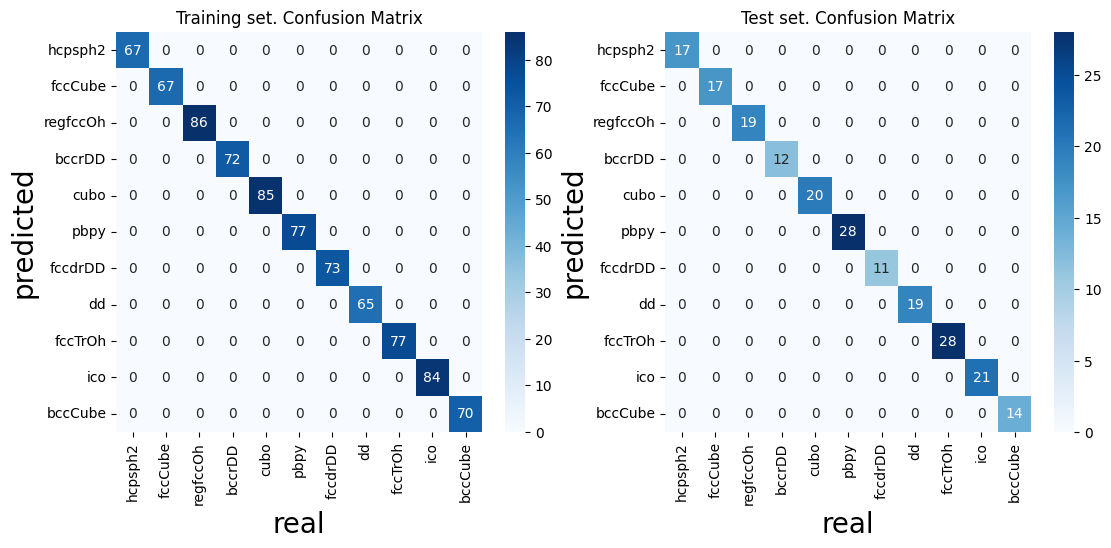

                Accurracy       MAE         MSE
 Training set.      1.00        0.00        0.00
     Test set.      1.00        0.00        0.00


In [36]:
y_train_hat = modelCD.predict(x_train)
y_test_hat = modelCD.predict(x_test)    

plotConfusionMatrix(y_train, y_train_hat, y_test, y_test_hat, uv, saveSVGImg='./ML-SavedFigures/CNN/ConfusionMatrix.svg')

#### Identification of structures from experimental RDF profiles

Icosahedron. First intense peak found at: 2.85 Å. g(r) = 3.39
Decahedron.  First intense peak found at: 2.85 Å. g(r) = 3.47


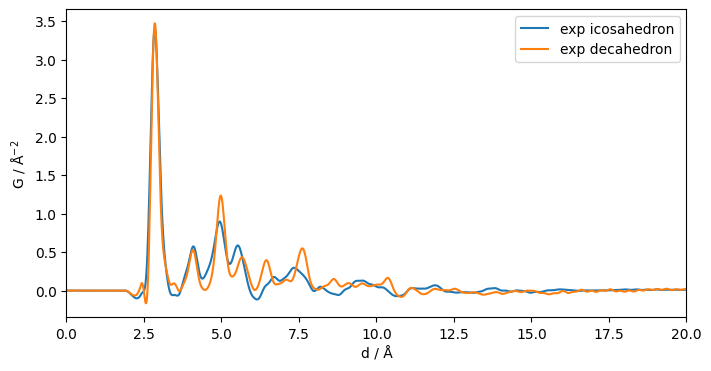

3001 0.01


In [37]:
peaksDeca, _ = find_peaks(grDeca,height=1)
peaksIco, _ = find_peaks(grIco,height=1)

print(f"Icosahedron. First intense peak found at: {rIco[peaksIco[0]]:.2f} Å. g(r) = {grIco[peaksIco[0]]:.2f}")
print(f"Decahedron.  First intense peak found at: {rDeca[peaksDeca[0]]:.2f} Å. g(r) = {grDeca[peaksDeca[0]]:.2f}")
_ = plt.plot(rIco,grIco,label='exp icosahedron')
_ = plt.plot(rDeca,grDeca,label='exp decahedron')
_ = plt.xlabel("d / Å")
_ = plt.ylabel("G / Å$^{-2}$")
_ = plt.xlim(0,20)
_ = plt.legend()
_ = plt.show()

print(len(rIco),rIco[1]-rIco[0])

30
Icosahedron.       First intense peak found at: 0.40 Å. g(r) = 1.00
Decahedron (pbpy). First intense peak found at: 1.00 Å. g(r) = 1.00


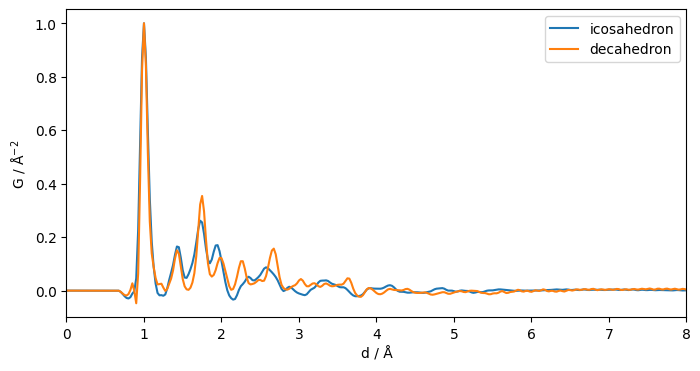

In [38]:
print(Rmax)
rIcoScaled, grIcoScaled = rescale1D(rIco,grIco,peaksIco[0],Rmax,0.025)
rDecaScaled, grDecaScaled = rescale1D(rDeca,grDeca,peaksDeca[0],Rmax,0.025)
peaksDecaScaled, _ = find_peaks(grDecaScaled,height=0.1)
peaksIcoScaled, _ = find_peaks(grIcoScaled,height=0.1)

print(f"Icosahedron.       First intense peak found at: {rIco[peaksIcoScaled[0]]:.2f} Å. g(r) = {grIcoScaled[peaksIcoScaled[0]]:.2f}")
print(f"Decahedron (pbpy). First intense peak found at: {rDecaScaled[peaksDecaScaled[0]]:.2f} Å. g(r) = {grDecaScaled[peaksDecaScaled[0]]:.2f}")
_ = plt.plot(rIcoScaled,grIcoScaled,label='icosahedron')
_ = plt.plot(rDecaScaled,grDecaScaled,label='decahedron')
_ = plt.xlabel("d / Å")
_ = plt.ylabel("G / Å$^{-2}$")
_ = plt.xlim(0,8)
_ = plt.legend()
_ = plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


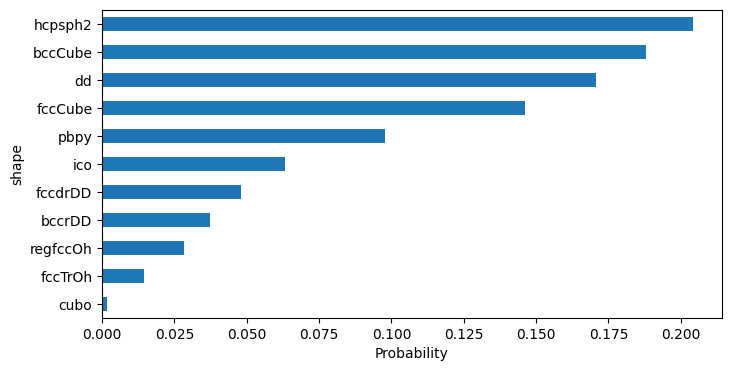

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


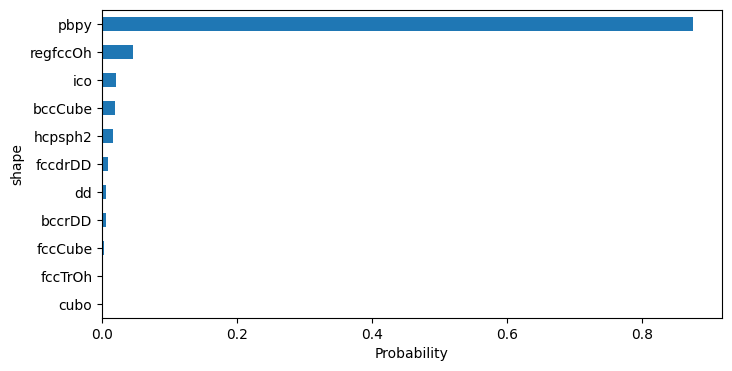

In [39]:
t4pPC.centerTitle("icosahedron")
gr = grIcoScaled.reshape(1,nFeatures)
NPproba = modelCD.predict(gr)

df = pd.DataFrame({'shape': uv,'probability': NPproba[0]})
df_sorted = df.sort_values('probability')
_ = df_sorted.plot(kind='barh', y='probability', x='shape',legend = False)
_ = plt.xlabel('Probability')
plt.show()

#================================================================================
t4pPC.centerTitle("decahedron")
gr = grDecaScaled.reshape(1,nFeatures)
NPproba = modelCD.predict(gr)

df = pd.DataFrame({'shape': uv,'probability': NPproba[0]})
df_sorted = df.sort_values('probability')
_ = df_sorted.plot(kind='barh', y='probability', x='shape',legend = False)
_ = plt.xlabel('Probability')

<div class="app">
The classification is in general not satisfying. 

**1.** Comment?

**2.** Run again the code with a deep learning dense NN, with 50 neurons in the first layer and 20 in the second one
</div>

### Second model: supervised learning of the polynomial type = classification with 1D convolutional / pooling / dense layers

#### Definition of the model

<div class="introT" title="conv1D input and output">

- **Input** = 3D tensor with shape `(batch, steps, channels)`
    - `batch` = number of samples of the dataset
- **Output** = 3D tensor with shape `(batch, new_steps, filters)`
</div>
<br>
<div class="introT" title="conv1D main variables">

The `filters` parameters is just how many different windows you will have. (All of them with the same length, which is `kernel_size`). How many different results or channels you want to produce.

When you use `filters = 100` and `kernel_size=4`, you are creating 100 different filters, each of them with length 4. The result will bring 100 different convolutions
</div>

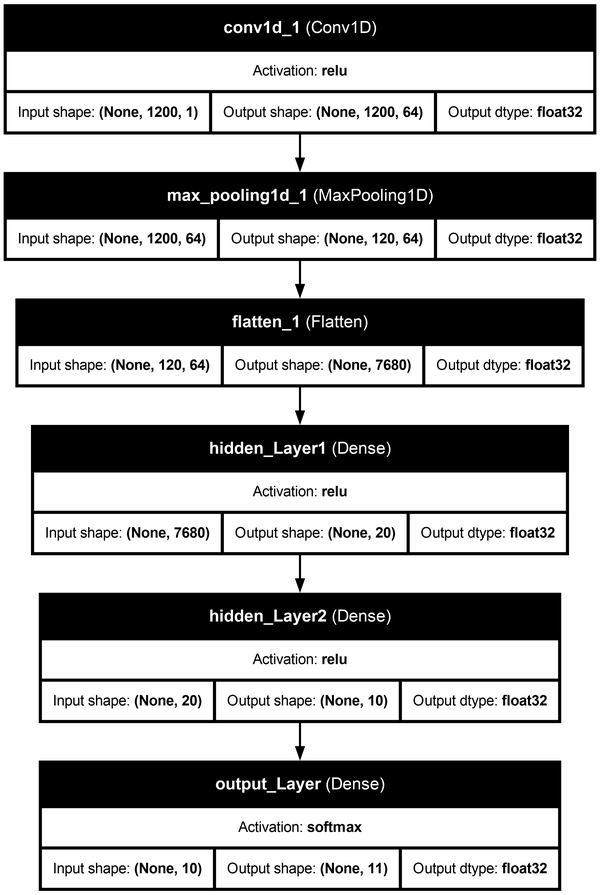

In [50]:
import tensorflow as tf
from tensorflow import keras

nFeatures = x_train.shape[1]
modelCC = keras.models.Sequential()
modelCC.add(keras.layers.Input(shape=(nFeatures, 1), name="iLayer"))
modelCC.add(keras.layers.Conv1D(filters = 64, kernel_size = 40, padding = 'same', activation='relu'))
modelCC.add(keras.layers.MaxPooling1D(pool_size=10))
modelCC.add(keras.layers.Flatten())
modelCC.add(keras.layers.Dense(20, activation='relu', name='hidden_Layer1'))
modelCC.add(keras.layers.Dense(10, activation='relu', name='hidden_Layer2'))
modelCC.add(keras.layers.Dense(len(uv), activation='softmax', name='output_Layer'))

metrics = ['accuracy','mae']

modelCC.compile(optimizer = 'adam',
                loss      = 'categorical_crossentropy',
                metrics   = metrics)

from tensorflow.keras.utils import plot_model
fig = plot_model(modelCC, dpi=300, show_dtype=True , show_shapes=True, show_layer_names=True, show_layer_activations=True)
t4pPC.displayModel(fig, width = 600)

#### Reshaping of the data

<div class="rqT" title="reshape?">

Reshaping means changing the shape of an array.

The shape of an array is the number of elements in each dimension. Wanna try it? <a href="./AdvancedPython.ipynb#reshape">Load the "AdvancedPython.ipynb" notebook</a>
</div>

In [51]:
print(f"shape of x_train = {x_train.shape}")
print(f"shape of y_train = {y_train.shape}")
x_train4C1D = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test4C1D = x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1)
print(f"shape of x_train4C1D = {x_train4C1D.shape}")

shape of x_train = (823, 1200)
shape of y_train = (823, 11)
shape of x_train4C1D = (823, 1200, 1)


#### Training

In [52]:
# Resets all state generated by Keras
tf.keras.backend.clear_session()

vID.chrono_start()
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=10, min_lr=0.001, mode='auto')

historyCC = modelCC.fit(x_train4C1D,
                      y_train,
                      epochs          = 200,
                      batch_size      = 10,
                      verbose         = 1,
                      validation_data = (x_test4C1D, y_test),
                      callbacks=[es,reduce_lr])
vID.chrono_show()

Epoch 1/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2977 - loss: 2.0681 - mae: 0.1543 - val_accuracy: 0.5000 - val_loss: 1.6098 - val_mae: 0.1375 - learning_rate: 0.0010
Epoch 2/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5407 - loss: 1.3700 - mae: 0.1177 - val_accuracy: 0.5971 - val_loss: 1.1244 - val_mae: 0.1040 - learning_rate: 0.0010
Epoch 3/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6488 - loss: 0.9799 - mae: 0.0933 - val_accuracy: 0.7282 - val_loss: 0.8373 - val_mae: 0.0840 - learning_rate: 0.0010
Epoch 4/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7667 - loss: 0.7023 - mae: 0.0737 - val_accuracy: 0.6990 - val_loss: 0.7573 - val_mae: 0.0712 - learning_rate: 0.0010
Epoch 5/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7983 - loss: 0.5547 - mae: 0.0587 - val_accuracy: 0.8058 - val_loss: 0.5361 - val_mae: 0.0573 - learning_rate: 0.0010
Epoch 6/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8408 - loss: 0.447

#### Evaluation of the accuracy

104
-0.0 0.5


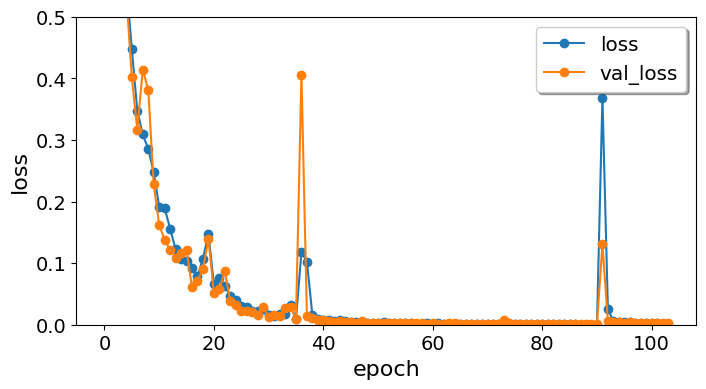

0.8 1.0


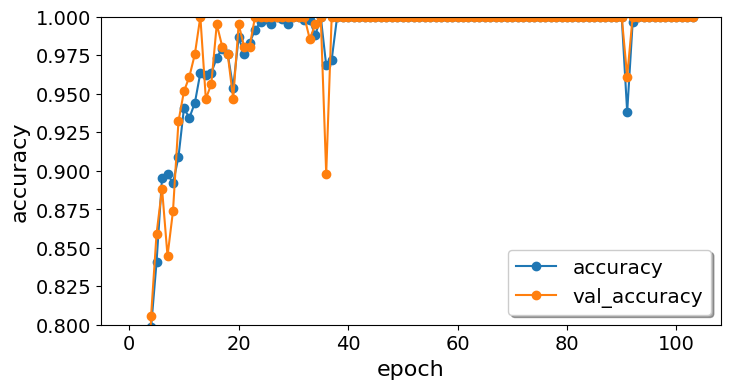

-0.0 0.1


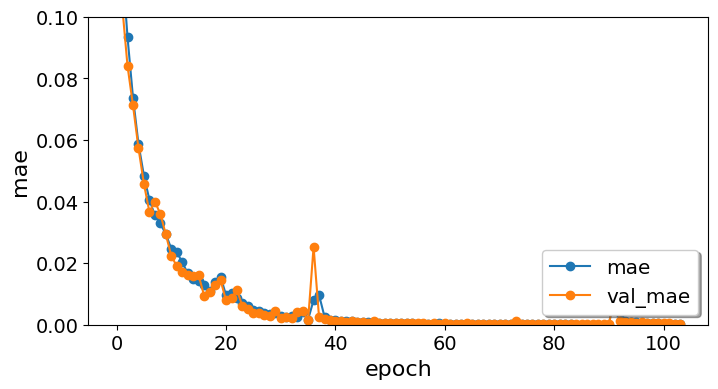

In [53]:
plotEpochs(historyCC,metrics)

In [54]:
printAcc(modelCC, x_train4C1D, y_train, x_test4C1D, y_test)

x_train / loss      : 0.0016
x_train / accuracy  : 1.0000
x_train / mae       : 0.0003

 x_test / loss      : 0.0020
 x_test / accuracy  : 1.0000
 x_test / mae       : 0.0004


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


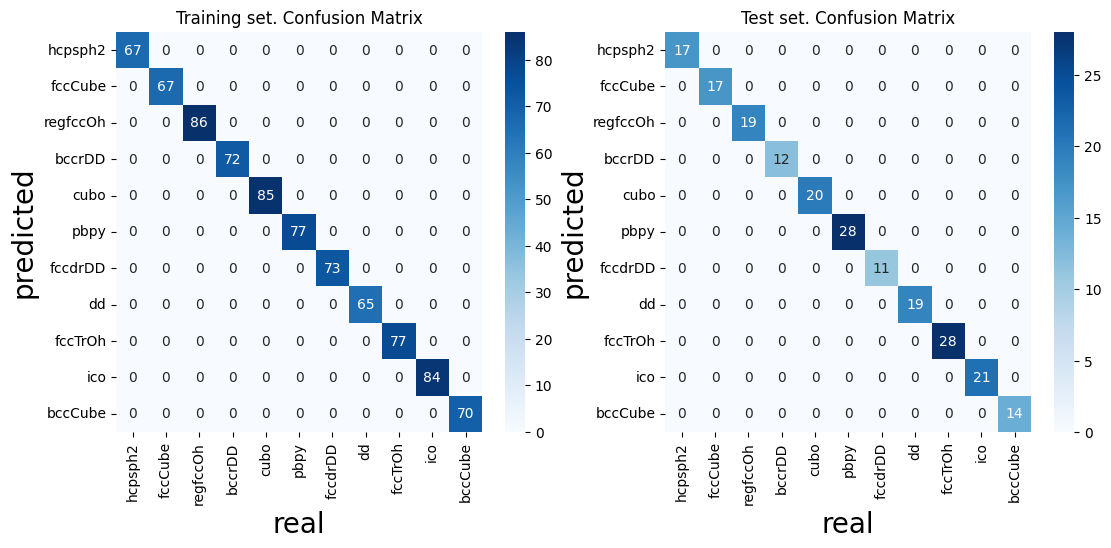

                Accurracy       MAE         MSE
 Training set.      1.00        0.00        0.00
     Test set.      1.00        0.00        0.00


In [55]:
y_train_hat = modelCC.predict(x_train)
y_test_hat = modelCC.predict(x_test)    

plotConfusionMatrix(y_train, y_train_hat, y_test, y_test_hat, uv)

#### Identification of structures from experimental RDF profiles

Icosahedron. First intense peak found at: 2.85 Å. g(r) = 3.39
Decahedron.  First intense peak found at: 2.85 Å. g(r) = 3.47


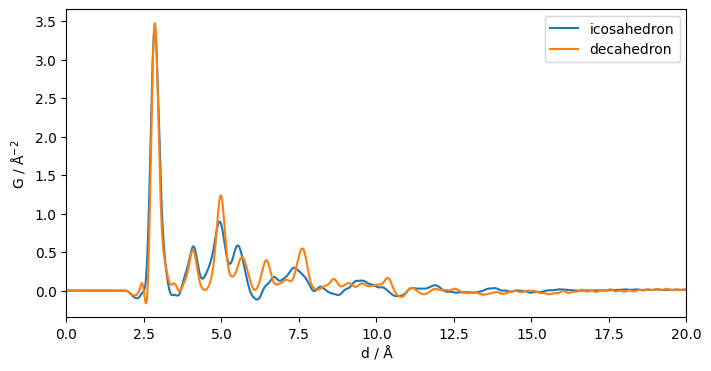

3001 0.01


In [56]:
peaksDeca, _ = find_peaks(grDeca,height=1)
peaksIco, _ = find_peaks(grIco,height=1)

print(f"Icosahedron. First intense peak found at: {rIco[peaksIco[0]]:.2f} Å. g(r) = {grIco[peaksIco[0]]:.2f}")
print(f"Decahedron.  First intense peak found at: {rDeca[peaksDeca[0]]:.2f} Å. g(r) = {grDeca[peaksDeca[0]]:.2f}")
_ = plt.plot(rIco,grIco,label='icosahedron')
_ = plt.plot(rDeca,grDeca,label='decahedron')
_ = plt.xlabel("d / Å")
_ = plt.ylabel("G / Å$^{-2}$")
_ = plt.xlim(0,20)
_ = plt.legend()
_ = plt.show()

print(len(rIco),rIco[1]-rIco[0])

30
Icosahedron.      First intense peak found at: 0.40 Å. g(r) = 1.00
Decahedron (pbp). First intense peak found at: 1.00 Å. g(r) = 1.00


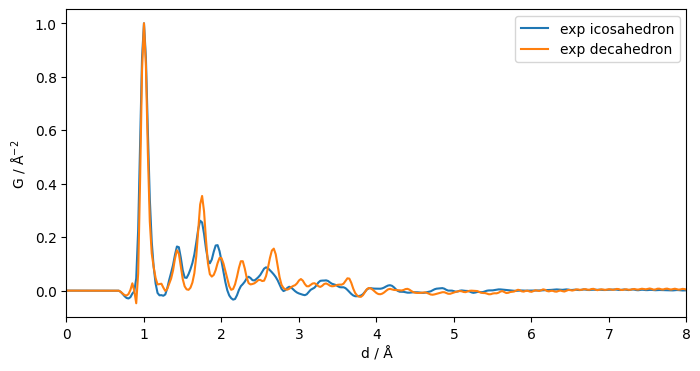

In [57]:
print(Rmax)
rIcoScaled, grIcoScaled = rescale1D(rIco,grIco,peaksIco[0],Rmax,0.025)
rDecaScaled, grDecaScaled = rescale1D(rDeca,grDeca,peaksDeca[0],Rmax,0.025)
peaksDecaScaled, _ = find_peaks(grDecaScaled,height=0.1)
peaksIcoScaled, _ = find_peaks(grIcoScaled,height=0.1)

print(f"Icosahedron.      First intense peak found at: {rIco[peaksIcoScaled[0]]:.2f} Å. g(r) = {grIcoScaled[peaksIcoScaled[0]]:.2f}")
print(f"Decahedron (pbp). First intense peak found at: {rDecaScaled[peaksDecaScaled[0]]:.2f} Å. g(r) = {grDecaScaled[peaksDecaScaled[0]]:.2f}")
_ = plt.plot(rIcoScaled,grIcoScaled,label='exp icosahedron')
_ = plt.plot(rDecaScaled,grDecaScaled,label='exp decahedron')
_ = plt.xlabel("d / Å")
_ = plt.ylabel("G / Å$^{-2}$")
_ = plt.xlim(0,8)
_ = plt.legend()
_ = plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


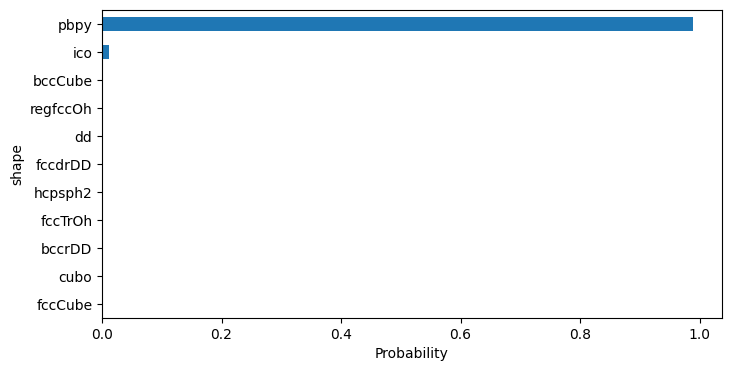

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


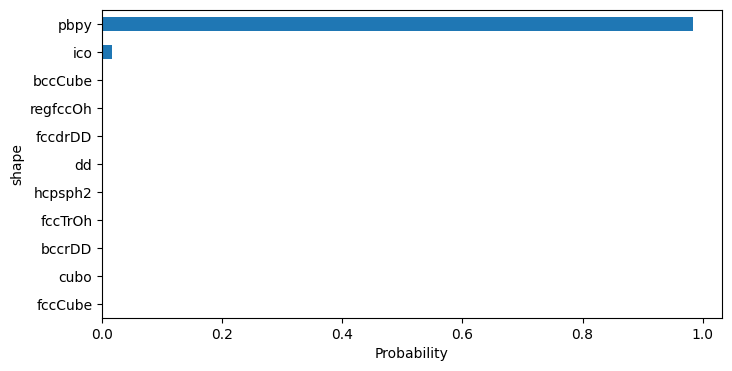

In [58]:
t4pPC.centerTitle("icosahedron")
gr = grIcoScaled.reshape(1,nFeatures)
NPproba = modelCC.predict(gr)

df = pd.DataFrame({'shape': uv,'probability': NPproba[0]})
df_sorted = df.sort_values('probability')
_ = df_sorted.plot(kind='barh', y='probability', x='shape',legend = False)
_ = plt.xlabel('Probability')
plt.show()

#================================================================================
t4pPC.centerTitle("decahedron")
gr = grDecaScaled.reshape(1,nFeatures)
NPproba = modelCC.predict(gr)

df = pd.DataFrame({'shape': uv,'probability': NPproba[0]})
df_sorted = df.sort_values('probability')
_ = df_sorted.plot(kind='barh', y='probability', x='shape',legend = False)
_ = plt.xlabel('Probability')

### Exercice

<div class="app">

Define a convolutional neural network that learns from the first derivative of the rdf
</div>

In [ ]:
# insert your code here


# Bibliography and useful links

**General resources**

- [Convolution article on Wikipedia](https://en.wikipedia.org/wiki/Convolution)
- [Hands-on machine learning with scikit-learn, keras and tensorflow (3rd edition, **2022**), Aurélien Géron, O'Reilly editions](https://github.com/ageron/handson-ml3)
- Some images were generated with [DALL·E](https://openai.com/dall-e-2)
- [DeepMath :  : Mathématiques des réseaux de neurones (in French)](https://exo7math.github.io/deepmath-exo7/)
- [Neural Network Models for Combined Classification and Regression](https://machinelearningmastery.com/neural-network-models-for-combined-classification-and-regression/)

**Articles**

- [Fages, Jolibois, Poteau, Recognition of the three-dimensional structure of small metal nanoparticles by a supervised artificial neural network (**2021**) *Theoret. Chem. Acc.*](https://doi.org/10.1007/s00214-021-02795-0)
- [Terban, Billinge, Structural Analysis of Molecular Materials Using the Pair Distribution Function (**2022**) *Chem. Rev.* ](https://doi.org/10.1021/acs.chemrev.1c00237)

# End

In [73]:
vID.end(cwd0)

**End at:** Saturday 27 September 2025, 22:05:10  
**Duration:** 01:10:19 560ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>

# Appendix

<div class="intro">

Concatenation of the RDF profiles into dataframes, then saved into csv files
</div>

In [25]:
import pandas as pd

dfF = pd.DataFrame()
dfFico = pd.DataFrame()
dfFpbpy = pd.DataFrame()
dfFOh = pd.DataFrame()
dfY = pd.DataFrame(columns=["F"])
import os, sys

pathway = "./ML-data/RDFs/simulRDF/"

shapes = []
for root, dir_names, file_names in os.walk(pathway):
    print(f"The root is {root}")
    print(f"The directory name is: {dir_names}")
    i = -1
    if not dir_names:
        i += 1
        parent_folder = root.split("/")
        parent_folder = parent_folder[-1]
        print(f"Parent folder = category = {parent_folder}")
        print(f"The file names are: {file_names}")
        print(f"*"*40)
        for f in sorted(file_names):
            fPrefix = f.split(".")[0]
            fPathway = root + "/" + f
            dfFi = pd.read_csv(fPathway, sep='\t', usecols=[1,2])
            dfFi.rename(columns={'g': fPrefix}, inplace=True)
            deltaR = dfFi['r'].iloc[1] - dfFi['r'].iloc[0]
            if i == 0:
                deltaRRef = deltaR
            else:
                if deltaR != deltaRRef: sys.exit(f"The {f} RDF profile does not have the same Δr step as the previously read profiles")
            dfF = pd.concat([dfF,dfFi[fPrefix]],axis=1).fillna(0)
            if parent_folder == 'ico': dfFico = pd.concat([dfFico,dfFi[fPrefix]],axis=1).fillna(0)
            if parent_folder == 'pbpy': dfFpbpy = pd.concat([dfFpbpy,dfFi[fPrefix]],axis=1).fillna(0)
            if parent_folder == 'regfccOh': dfFOh = pd.concat([dfFOh,dfFi[fPrefix]],axis=1).fillna(0)
            dfY.loc[fPrefix] = [parent_folder]
    else:
        print(f"="*20)

## add r
dfF["r"] = dfF.index*deltaRRef
rColumn = dfF.pop("r")
dfF.insert(0, "r", rColumn)

dfFico["r"] = dfFico.index*deltaRRef
rColumn = dfFico.pop("r")
dfFico.insert(0, "r", rColumn)

dfFpbpy["r"] = dfFpbpy.index*deltaRRef
rColumn = dfFpbpy.pop("r")
dfFpbpy.insert(0, "r", rColumn)

dfFOh["r"] = dfFOh.index*deltaRRef
rColumn = dfFOh.pop("r")
dfFOh.insert(0, "r", rColumn)

display(dfF)
display(dfY)
dfF.to_csv(pathway+"RDF_profiles.csv",sep="\t")
dfY.to_csv(pathway+"RDF_labels.csv",sep="\t")
dfFico.to_csv(pathway+"RDF_profiles_ico.csv",sep="\t")
dfFpbpy.to_csv(pathway+"RDF_profiles_pbpy.csv",sep="\t")
dfFOh.to_csv(pathway+"RDF_profiles_Oh.csv",sep="\t")

The root is ./ML-data/RDFs/simulRDF/
The directory name is: ['hcpsph2', 'fccCube', 'regfccOh', 'bccrDD', 'cubo', 'pbpy', 'fccdrDD', 'dd', 'fccTrOh', 'ico', 'bccCube']
The root is ./ML-data/RDFs/simulRDF/hcpsph2
The directory name is: []
Parent folder = category = hcpsph2
The file names are: ['hcpsph2_020_012.rdf', 'hcpsph2_000_006.rdf', 'hcpsph2_030_013.rdf', 'hcpsph2_030_014.rdf', 'hcpsph2_010_000.rdf', 'hcpsph2_000_014.rdf', 'hcpsph2_010_007.rdf', 'hcpsph2_020_006.rdf', 'hcpsph2_000_015.rdf', 'hcpsph2_010_011.rdf', 'hcpsph2_010_010.rdf', 'hcpsph2_010_008.rdf', 'hcpsph2_020_016.rdf', 'hcpsph2_000_011.rdf', 'hcpsph2_020_008.rdf', 'hcpsph2_030_003.rdf', 'hcpsph2_010_006.rdf', 'hcpsph2_020_005.rdf', 'hcpsph2_020_020.rdf', 'hcpsph2_020_002.rdf', 'hcpsph2_010_015.rdf', 'hcpsph2_020_004.rdf', 'hcpsph2_000_008.rdf', 'hcpsph2_030_020.rdf', 'hcpsph2_030_018.rdf', 'hcpsph2_000_020.rdf', 'hcpsph2_030_012.rdf', 'hcpsph2_010_009.rdf', 'hcpsph2_030_004.rdf', 'hcpsph2_020_018.rdf', 'hcpsph2_030_000.

,r,hcpsph2_000_000,hcpsph2_000_001,hcpsph2_000_002,hcpsph2_000_003,hcpsph2_000_004,hcpsph2_000_005,hcpsph2_000_006,hcpsph2_000_007,hcpsph2_000_008,...,bccCube_030_011,bccCube_030_012,bccCube_030_013,bccCube_030_014,bccCube_030_015,bccCube_030_016,bccCube_030_017,bccCube_030_018,bccCube_030_019,bccCube_030_020
0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,63.400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2537,63.425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2538,63.450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2539,63.475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,F
hcpsph2_000_000,hcpsph2
hcpsph2_000_001,hcpsph2
hcpsph2_000_002,hcpsph2
hcpsph2_000_003,hcpsph2
hcpsph2_000_004,hcpsph2
...,...
bccCube_030_016,bccCube
bccCube_030_017,bccCube
bccCube_030_018,bccCube
bccCube_030_019,bccCube
